In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_34544_Z')

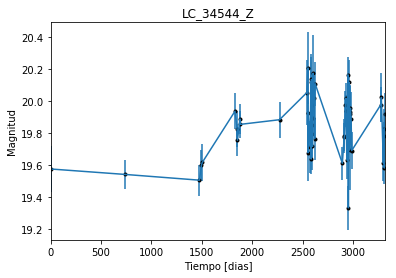

In [2]:
data = np.genfromtxt('LC_34544_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_34544_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

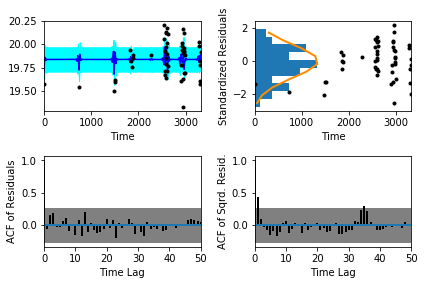

In [5]:
sample.assess_fit()

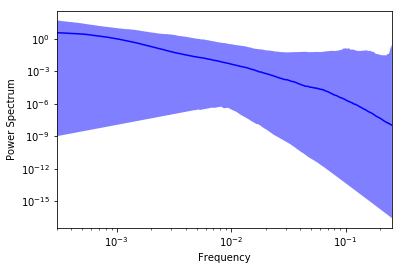

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_34544_Z')

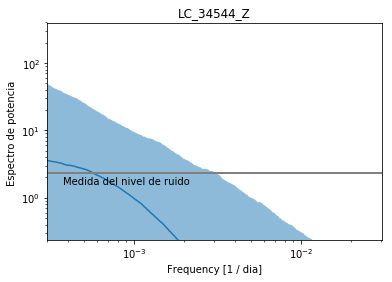

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_34544_Z')

Text(0.5,1,'Prediccion , valor esperado LC_34544_Z')

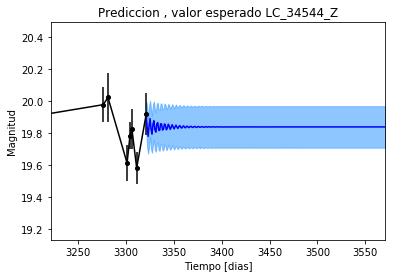

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_34544_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_34544_Z')

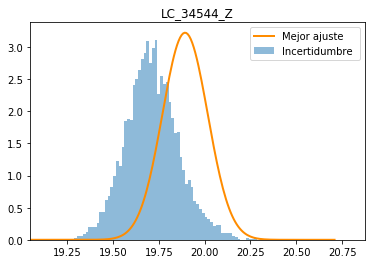

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_34544_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_34544_Z')

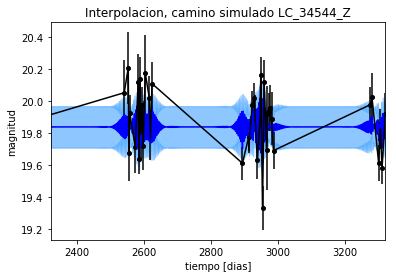

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34544_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_34544_Z')

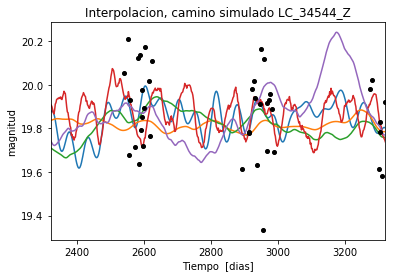

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34544_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 454.026626196
Median: 0.00726604428372
Standard deviation: 0.0895308519416
68% credibility interval: [ 0.00072939  0.09211976]
95% credibility interval: [  3.39246759e-04   3.51634052e-01]
99% credibility interval: [  3.05042723e-04   4.72018475e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 444.838552413
Median: 0.00336483896724
Standard deviation: 0.0583606347407
68% credibility interval: [ 0.00048524  0.0390287 ]
95% credibility interval: [ 0.00032479  0.21629389]
99% credibility interval: [  3.02683974e-04   3.77795365e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 274.286696126
Median: 0.0210703351722
Standar

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 315.047183308
Median: 31.8438870802
Standard deviation: 1.76626382964
68% credibility interval: [ 30.13345744  33.32002639]
95% credibility interval: [ 27.90241413  35.07301237]
99% credibility interval: [ 25.99676058  35.66252881]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 697.06805521
Median: 0.587508586864
Standard deviation: 1.3317855438
68% credibility interval: [ 0.059815    2.51747685]
95% credibility interval: [ 0.01525045  4.52877408]
99% credibility interval: [ 0.01001817  6.30440515]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 123.067054957
Median: 0.642110810513
Standard deviation: 4.18964656833
68% credibility interval: [ 0.01722839  6.7419883 ]
95% credibility interval: [  8.40997179e-04 

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2880.64960807
Median: 9.67533182059e-36
Standard deviation: 1.16017514794e+17
68% credibility interval: [  4.34444002e-75   2.91022592e+00]
95% credibility interval: [  3.20169533e-102   3.38900279e+007]
99% credibility interval: [  3.37048505e-127   5.17970391e+012]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 324.030416365
Median: 19.7895820462
Standard deviation: 0.0880792254442
68% credibility interval: [ 19.69876971  19.84223713]
95% credibility interval: [ 19.56719927  19.89197948]
99% credibility interval: [ 19.40110891  19.9792053 ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 165.254405508
Median: 0.0758349313007
Standard deviation: 0.159900018899
68% credibility interval: [ 0.          0.33666341]
95% credibility interval: [ 0.          0.47777999]
99% credibility interval: [ 0.          0.50166931]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 165.254405508
Median: 0.0758349313007
Standard deviation: 0.159900018899
68% credibility interval: [ 0.          0.33666341]
95% credibility interval: [ 0.          0.47777999]
99% credibility interval: [ 0.          0.50166931]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 113.993779101
Median: 0.0
Standard deviation: 0.0719661397737
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 315.047183308
Median: 31.8438870802
Standard deviation: 1.76626382964
68% credibility interval: [ 30.13345744  33.32002639]
95% credibility interval: [ 27.90241413  35.07301237]
99% credibility interval: [ 25.99676058  35.66252881]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2027.25076372
Median: 0.018512367302
Standard deviation: 0.0294239555353
68% credibility interval: [ 0.00911806  0.03692371]
95% credibility interval: [ 0.00309984  0.08990079]
99% credibility interval: [ 0.00075525  0.17893908]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 811.667739911
Median: 1.37932672709
Standard deviation: 0.246644424593
68% credibility interval: [ 1.12989169  1.62103518]
95% credibility interval: [ 0.87874614  1.86270276]
99% credibility interval: [ 0.76751778  1.95458272]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 542.687593466
Median: 7.23148317344e-05
Standard deviation: 0.880915364766
68% credibility interval: [  3.31525254e-07   5.27883132e-02]
95% credibility interval: [  2.71636822e-10   1.09046627e+00]
99% credibility interval: [  1.67102627e-15   3.76774348e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 454.026626196
Median: (-0.0456539026848-1.68816383248j)
Standard deviation: 1.15144902899
68% credibility interval: [-0.57880555-2.58859994j -0.00458292-0.76349952j]
95% credibility interval: [ -2.20938191e+00+0.j          -2.13155025e-03-0.44104951j]
99% credibility interval: [ -2.96577955e+00+0.j          -1.91663996e-03-1.52144892j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 444.838552413
Median: (-0.02114190676+1.58583867521j)
Standard deviation: 1.06950777065
68% credibility interval: [-0.24522455+1.54155623j -0.00304887+0.19594935j]
95% credibility interval: [-1.35901457+1.21456373j -0.00204071+0.j        ]
99% credibility interval: [ -2.37375829e+00+1.756101j  -1.90181950e-03+0.j      ]
Posterior summary fo